In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("weight-height.csv")
print(dataset.shape)
dataset.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Histogram

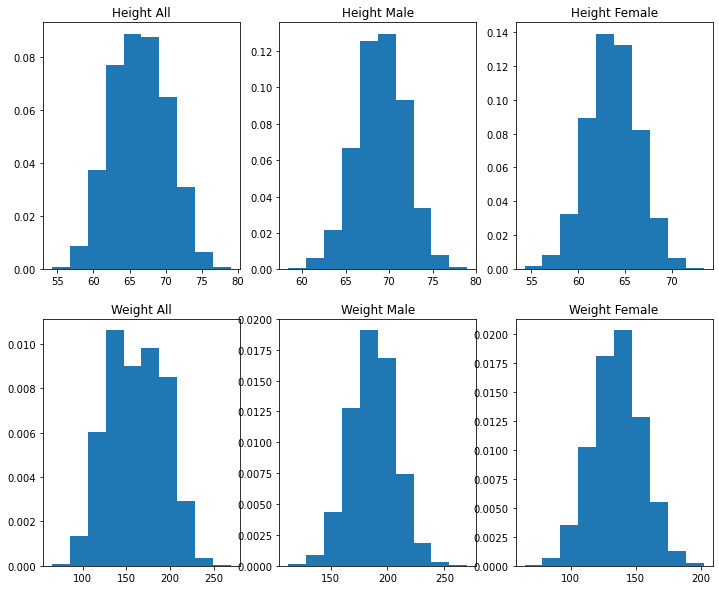

In [4]:
plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
plt.title("Height All")
plt.hist("Height", data = dataset, density = True)

plt.subplot(2,3,2)
plt.title("Height Male")
plt.hist("Height", data = dataset[dataset["Gender"] == "Male"], density = True)

plt.subplot(2,3,3)
plt.title("Height Female")
plt.hist("Height", data = dataset[dataset["Gender"] == "Female"], density = True)

plt.subplot(2,3,4)
plt.title("Weight All")
plt.hist("Weight", data = dataset, density = True)

plt.subplot(2,3,5)
plt.title("Weight Male")
plt.hist("Weight", data = dataset[dataset["Gender"] == "Male"], density = True)

plt.subplot(2,3,6)
plt.title("Weight Female")
plt.hist("Weight", data = dataset[dataset["Gender"] == "Female"], density = True)

plt.show()

# KDE
We can use the formula like below.

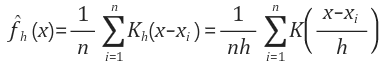

## A rule-of-thumb bandwidth estimator
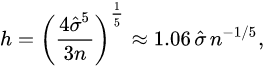


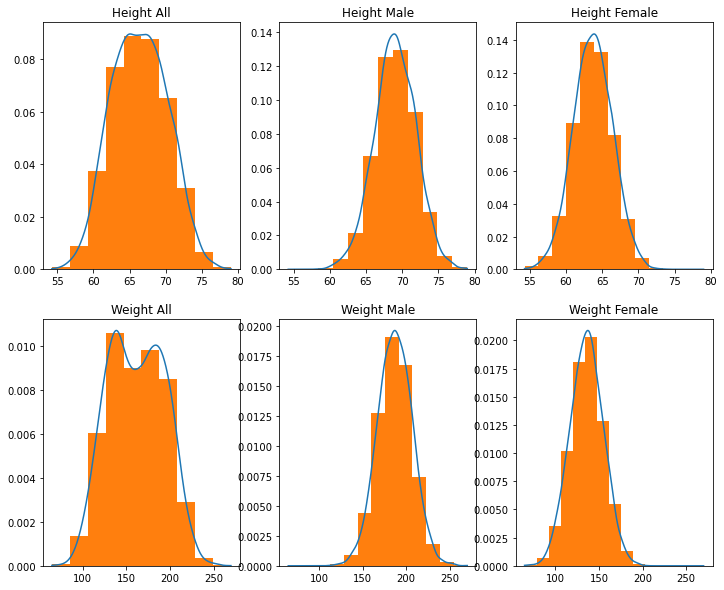

In [21]:
# Normal desnsity function

def Gaussian(x, mean = 0, std = 1):
    return np.exp((-1)*(x - mean)**2 / (2*(std**2))) /(np.sqrt(2*np.pi)*std)

def make_kde(dataset, h = 1):
    n = len(dataset)**(-1/5)
    h = 1.06*np.std(dataset)*n
    target = sum(Gaussian((x_d - xi)/h) for xi in dataset)
    target /= (len(dataset)*h)
    return target

# setting
x_d = np.linspace(min(dataset["Height"]), max(dataset["Height"]), 1000)
plt.figure(figsize = (12,10))

#1
plt.subplot(2,3,1)
plt.title("Height All")
plt.plot(x_d,make_kde(dataset["Height"]))
plt.hist(dataset["Height"], density = True)

#2
plt.subplot(2,3,2)
plt.title("Height Male")
plt.plot(x_d,make_kde(dataset[dataset["Gender"] == "Male"]["Height"]))
plt.hist(dataset[dataset["Gender"] == "Male"]["Height"], density = True)

#3
plt.subplot(2,3,3)
plt.title("Height Female")
plt.plot(x_d,make_kde(dataset[dataset["Gender"] == "Female"]["Height"]))
plt.hist(dataset[dataset["Gender"] == "Female"]["Height"], density = True)

## Weight ## 
x_d = np.linspace(min(dataset["Weight"]), max(dataset["Weight"]), 1000)

#4
plt.subplot(2,3,4)
plt.title("Weight All")
plt.plot(x_d,make_kde(dataset["Weight"]))
plt.hist(dataset["Weight"], density = True)

#5
plt.subplot(2,3,5)
plt.title("Weight Male")
plt.plot(x_d,make_kde(dataset[dataset["Gender"] == "Male"]["Weight"]))
plt.hist(dataset[dataset["Gender"] == "Male"]["Weight"], density = True)

#6
plt.subplot(2,3,6)
plt.title("Weight Female")
plt.plot(x_d,make_kde(dataset[dataset["Gender"] == "Female"]["Weight"]))
plt.hist(dataset[dataset["Gender"] == "Female"]["Weight"], density = True)

plt.show()

# Gaussian with MLE

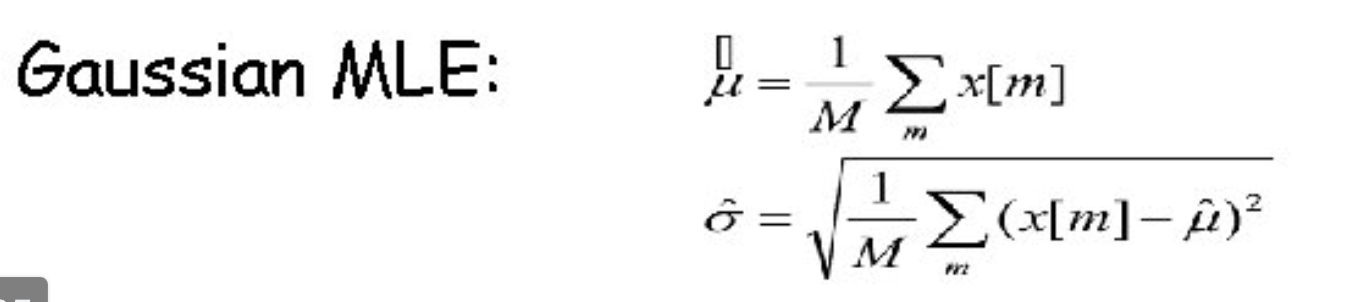

In [34]:
def Gaussian(x, mean, std):
    return np.exp((-1)*(x - mean)**2 / (2*(std**2))) /(np.sqrt(2*np.pi)*std)

def Calculate(dataset):
    mu = np.mean(dataset)
    sigma = np.std(dataset)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    return mu, sigma, x

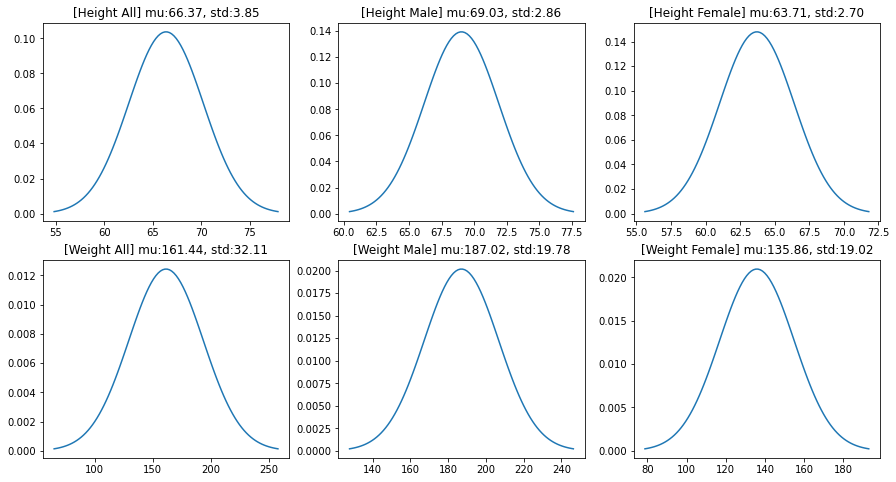

In [51]:
plt.figure(figsize = (15,8))

#1
plt.subplot(2,3,1)
mu, sigma, x = Calculate(dataset["Height"])
plt.plot(x,Gaussian(x,mu,sigma))
plt.title("[Height All] mu:{:.2f}, std:{:.2f}".format(mu,sigma))

#2
plt.subplot(2,3,2)
mu, sigma, x = Calculate(dataset[dataset["Gender"] == "Male"]["Height"])
plt.plot(x,Gaussian(x,mu,sigma))
plt.title("[Height Male] mu:{:.2f}, std:{:.2f}".format(mu,sigma))

#3
plt.subplot(2,3,3)
mu, sigma, x = Calculate(dataset[dataset["Gender"] == "Female"]["Height"])
plt.plot(x,Gaussian(x,mu,sigma))
plt.title("[Height Female] mu:{:.2f}, std:{:.2f}".format(mu,sigma))

#4
plt.subplot(2,3,4)
mu, sigma, x = Calculate(dataset["Weight"])
plt.plot(x,Gaussian(x,mu,sigma))
plt.title("[Weight All] mu:{:.2f}, std:{:.2f}".format(mu,sigma))

#5
plt.subplot(2,3,5)
mu, sigma, x = Calculate(dataset[dataset["Gender"] == "Male"]["Weight"])
plt.plot(x,Gaussian(x,mu,sigma))
plt.title("[Weight Male] mu:{:.2f}, std:{:.2f}".format(mu,sigma))

#6
plt.subplot(2,3,6)
mu, sigma, x = Calculate(dataset[dataset["Gender"] == "Female"]["Weight"])
plt.plot(x,Gaussian(x,mu,sigma))
plt.title("[Weight Female] mu:{:.2f}, std:{:.2f}".format(mu,sigma))


plt.show()